<a href="https://colab.research.google.com/github/Nidhi-Mantri/Emotion-Classification/blob/master/annaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

    100% |████████████████████████████████| 993kB 24.0MB/s 
title fer2013.csv, id 1fMBtuQEVesZSY22lVIk-6j4tOBz_4khM


In [0]:
file_id = '1fMBtuQEVesZSY22lVIk-6j4tOBz_4khM'
downloaded = drive.CreateFile({'id': file_id})

import pandas as pd
downloaded.GetContentFile('fer2013.csv')  
df3 = pd.read_csv('fer2013.csv')
print(df3.head(5))

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


# **0 : Angry, 1 : Disgust, 2 : Fear, 3 : Happy, 4 : Sad, 5 : Surprise, 6 : Neutral**

In [0]:
emotion = df3['emotion']
print(emotion.unique())

[0 2 4 6 3 5 1]


In [0]:
usage = df3['Usage']
print(usage.unique())

['Training' 'PublicTest' 'PrivateTest']


In [0]:
import matplotlib.pyplot as plt
dicty = {}
#for i in emotion.unique():
emoti_count = emotion.value_counts()
print(emoti_count)

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


In [0]:
e_counts = [emoti_count[i] for i in range(len(emoti_count))]
e_index = [i for i in range(len(emoti_count))]
print(e_index)
print(e_counts)

[0, 1, 2, 3, 4, 5, 6]
[4953, 547, 5121, 8989, 6077, 4002, 6198]


In [0]:
usage_count = usage.value_counts()
u_label = ['Training', 'PrivateTest', 'PublicTest']
u_counts = [usage_count[i] for i in range(len(usage_count))]
print(u_label)
u_index = [i for i in range(len(usage_count))]
print(u_counts)

['Training', 'PrivateTest', 'PublicTest']
[28709, 3589, 3589]


Visualization : emotion and its frequency

# Emotion : -
Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral

4953, 547, 5121, 8989, 6077, 4002, 6198

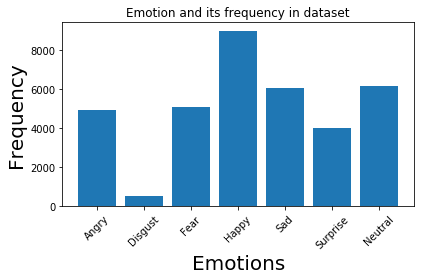

In [0]:
label = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
plt.bar(e_index, e_counts)
plt.xlabel('Emotions', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(e_index, label, fontsize=10, rotation=45)
plt.title('Emotion and its frequency in dataset')
plt.tight_layout()
from google.colab import files
#plt.savefig("Emotion_Frequency.png", )
#files.download("Emotion_Frequency.png")
plt.show()
plt.close()


# Usage : -
 Training - 28709,   PublicTest - 3589,   PrivateTest - 3589

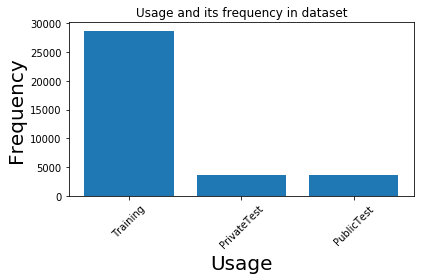

In [0]:
plt.bar(u_index, u_counts)
plt.xlabel('Usage', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(u_index, u_label, fontsize=10, rotation=45)
plt.title('Usage and its frequency in dataset')
plt.tight_layout()
#from google.colab import files
#plt.savefig("Usage_Frequency.png", )
#files.download("Usage_Frequency.png")
plt.show()
plt.close()

In [0]:
import numpy as np
pixel = df3['pixels']
print(pixel[0])
faces = []  
for i in range(len(pixel)):
  face = [int(j) for j in pixel[i].split(' ')]
  face = np.asarray(face).reshape(48, 48)
  #print(face)
  faces.append(face)

70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92 

In [0]:
print(face.shape)
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
emotions = pd.get_dummies(df3['emotion']).values
print(emotions[0])
print(emotions.shape)
print(faces.shape)

(48, 48)
[1 0 0 0 0 0 0]
(35887, 7)
(35887, 48, 48, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.1, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=41)

In [0]:
print(len(X_train))
#print(len(X_val))
print(len(X_test))

32298
3589


In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48

model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))
model.summary()
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)

def myprint(s):
    with open('modelsummary.txt','w+') as f:
        print(s, file=f)

model.summary(print_fn=myprint)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 23, 23, 128)       512       
__________

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://895c346f.ngrok.io


In [0]:
tensorboard = TensorBoard(log_dir='./logs', write_graph=True, write_images=True)

In [0]:
import os
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
checkpoint_path = "./weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

#model = create_model()

model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_test), np.array(y_test)),
          shuffle=True,
          callbacks=[lr_reducer, tensorboard, early_stopper, cp_callback])



Instructions for updating:
Use tf.cast instead.
Train on 32298 samples, validate on 3589 samples
Epoch 1/100
32298/32298 [==============================] - 32s 1ms/step - loss: 2.0227 - acc: 0.2142 - val_loss: 1.8215 - val_acc: 0.2455

Epoch 00001: val_loss improved from inf to 1.82153, saving model to ./weights.h5
Epoch 2/100
32298/32298 [==============================] - 28s 859us/step - loss: 1.8371 - acc: 0.2471 - val_loss: 1.8131 - val_acc: 0.2460

Epoch 00002: val_loss improved from 1.82153 to 1.81312, saving model to ./weights.h5
Epoch 3/100
32298/32298 [==============================] - 28s 867us/step - loss: 1.8088 - acc: 0.2552 - val_loss: 1.9039 - val_acc: 0.2455

Epoch 00003: val_loss did not improve from 1.81312
Epoch 4/100
32298/32298 [==============================] - 28s 855us/step - loss: 1.7481 - acc: 0.2880 - val_loss: 1.7930 - val_acc: 0.2530

Epoch 00004: val_loss improved from 1.81312 to 1.79297, saving model to ./weights.h5
Epoch 5/100
32298/32298 [==============

In [0]:
import keras
model.save("annaya.h5")
new_model = keras.models.load_model('annaya.h5')
new_model.summary()
#files.download('annaya.h5')
uploaded = drive.CreateFile({'title': 'annaya.h5'})
uploaded.SetContentFile('annaya.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 23, 23, 128)       512       
__________

In [0]:
model.save_weights("training_weights.h5")
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size=batch_size)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))
#files.download('weights.hdf5')
#files.download("training_weights.h5")
uploaded = drive.CreateFile({'title': 'weights.h5'})
uploaded.SetContentFile('weights.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

3589/3589 [==============================] - 1s 261us/step
Loss: 1.0343570368357706
Accuracy: 0.6603510727388143


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

In [0]:
from google.colab import files
files.download('photo.jpg')

# KNeighborsClassification

In [0]:
import numpy as np
pixel = df3['pixels']
print(pixel[0])
faces = []  
for i in range(len(pixel)):
  face = [int(j) for j in pixel[i].split(' ')]
  #face = np.asarray(face).reshape(48, 48)
  #print(face)
  faces.append(face)

70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92 

In [0]:
#print(face.shape)
faces = np.asarray(faces)
#faces = np.expand_dims(faces, -1)
emotions = df3['emotion']
print(emotions[0])
print(emotions.shape)
print(faces.shape)

0
(35887,)
(35887, 2304)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.1, random_state=42)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
model.fit(np.array(X_train), np.array(y_train))
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred, normalize=True))

0.3502368347729172
